In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os
import random
import time

# Inside the /Multimodal-Deep-Regression/notebooks
import sys
sys.path.append("..")

from util.utilities import train, evaluate, get_device
from util.data_utilities import get_base_tensor_directories, generate_batch
from util.data_utilities import process_data

In [2]:
# Current Path
os.getcwd()

'/home/louis/Documents/gatech/Summer2023/Multimodal-Deep-Regression/notebooks'

In [3]:
device = get_device()
x_dir, y_dir = get_base_tensor_directories(input_type='video_pack_1000')

x_files = sorted([os.path.join(x_dir, f) for f in os.listdir(x_dir)])
y_files = sorted([os.path.join(y_dir, f) for f in os.listdir(y_dir)])

You are using device: cuda


In [4]:
# load all tensors
x_data = [torch.load(f) for f in x_files]
y_data = [torch.load(f) for f in y_files]

# Split the data
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, shuffle=False)
print(x_train[0].size())
print(x_val[0].size())
print(len(y_train))
print(len(y_val))

torch.Size([3, 3, 128, 72])
torch.Size([3, 3, 128, 72])
80
20


In [ ]:
for x in xdata:
    videodata, audioembeding = x
ydata

out = combinemodel(videodata, audioembeding = x)
loss fucntion(out, ydata)

In [5]:
# Create Batches with DataLoaders
batch_size = 1
train_loader = list(zip(x_train, x_train)) #TensorDataset(x_train, y_train)
val_loader = list(zip(x_val, x_val)) #TensorDataset(x_val, y_val)
train_loader = DataLoader(train_loader, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_loader, batch_size=batch_size, shuffle=False)

data, targets = next(iter(train_loader))
data.size(), targets.size()

(torch.Size([1, 3, 6, 128, 72]), torch.Size([1, 3, 6, 128, 72]))

In [6]:
# This need to same as the main & preprocess
frames_to_skip=200 # how many frame to skip, reduce depth
shrink=8 # shrink H x W, the higher the smaller scale
normalize=False # normalize the pixel to 0 to 1

In [7]:
from models import ConvLSTMAutoencoder
model = ConvLSTMAutoencoder(hidden_dim=64, shrink=shrink, normalize=normalize)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")

EPOCHS = 100

train_losses = []
val_losses = []
start_time = time.time()

for epoch in range(EPOCHS):
    train_loss, avg_train_loss = train(model, train_loader, criterion, optimizer)
    #val_loss, avg_val_loss = evaluate(model, val_loader, criterion)
    
    # record the losses
    train_losses.append(avg_train_loss)
    #val_losses.append(avg_val_loss)

    # print every num times epoch only
    num = 1
    if ((epoch+1) % num == 0) or epoch == 0:
        if epoch == 0:
            time_took = (time.time() - start_time) / 60
            print(f'First epoch took {time_took:.1f} minutes.')
        print(f'Epoch {epoch+1}/{EPOCHS}, Train_Loss: {train_loss:.2f}, Avg: {avg_train_loss:.2f}')
              #; Val_Loss: {val_loss:.2f}, Avg: {avg_val_loss:.2f}')

Total parameters: 1,041,859
First epoch took 1.8 minutes.
Epoch 1/100, Train_Loss: 455084.34, Avg: 5688.55
Epoch 2/100, Train_Loss: 346042.98, Avg: 4325.54
Epoch 3/100, Train_Loss: 306421.71, Avg: 3830.27
Epoch 4/100, Train_Loss: 307873.19, Avg: 3848.41
Epoch 5/100, Train_Loss: 275172.18, Avg: 3439.65
Epoch 6/100, Train_Loss: 270030.87, Avg: 3375.39
Epoch 7/100, Train_Loss: 260908.57, Avg: 3261.36
Epoch 8/100, Train_Loss: 253409.68, Avg: 3167.62
Epoch 9/100, Train_Loss: 248725.42, Avg: 3109.07
Epoch 10/100, Train_Loss: 242685.22, Avg: 3033.57
Epoch 11/100, Train_Loss: 241273.35, Avg: 3015.92
Epoch 12/100, Train_Loss: 252502.89, Avg: 3156.29
Epoch 13/100, Train_Loss: 235732.01, Avg: 2946.65
Epoch 14/100, Train_Loss: 220816.55, Avg: 2760.21
Epoch 15/100, Train_Loss: 225478.89, Avg: 2818.49
Epoch 16/100, Train_Loss: 210018.84, Avg: 2625.24
Epoch 17/100, Train_Loss: 202235.78, Avg: 2527.95
Epoch 18/100, Train_Loss: 199614.34, Avg: 2495.18
Epoch 19/100, Train_Loss: 208130.14, Avg: 2601.63
E

In [8]:
# save model if better or not exists
model_weights = {'model_state_dict': model.state_dict(), 'val_loss': avg_train_loss}
weights_file = '../models/save/ConvLSTMAutoencoder_hidden64_weights.pt'
if not os.path.isfile(weights_file):
    # save new
    torch.save(model_weights, weights_file)
elif model_weights['val_loss'] < torch.load(weights_file)['val_loss']:
    # replace
    torch.save(model_weights, weights_file)

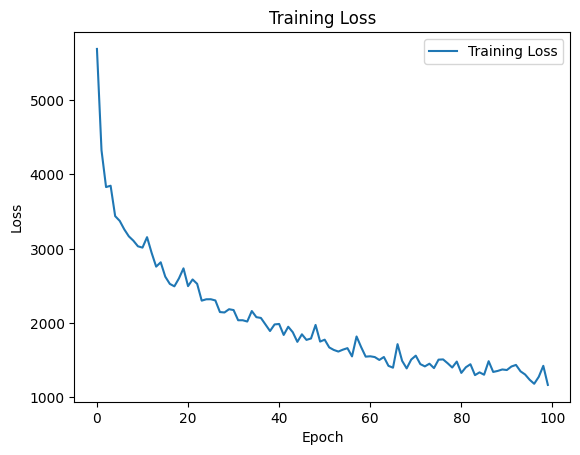

In [9]:
import matplotlib.pyplot as plt

# lost plot
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [10]:
check = 1
i = 0
for inputs, targets in val_loader:
    i += 1
    if i == check:
        inputs, targets = inputs.to(torch.float32), targets.to(torch.float32)
        outputs = model(inputs)
        break
outputs.squeeze()[:,1,:,:]

tensor([[[178.1656, 201.3502, 202.4647,  ..., 220.0779, 216.7155, 190.7361],
         [202.4249, 226.5404, 224.2375,  ..., 240.4488, 239.9552, 217.7562],
         [198.2463, 219.6806, 212.3977,  ..., 234.3974, 235.7006, 216.2633],
         ...,
         [150.6179, 156.0348, 131.3144,  ..., 212.1329, 222.0521, 204.4029],
         [161.9623, 178.4026, 160.7475,  ..., 231.4369, 235.5428, 215.8950],
         [151.9744, 167.0196, 158.8499,  ..., 206.9399, 209.3839, 186.7385]],

        [[175.6855, 195.8056, 196.4772,  ..., 211.8582, 208.8815, 182.0713],
         [194.5045, 216.4744, 212.0286,  ..., 228.2517, 228.9973, 204.1630],
         [189.7791, 209.0374, 199.2974,  ..., 219.3545, 222.8180, 203.5140],
         ...,
         [155.6460, 165.1910, 145.3406,  ..., 215.6211, 223.9044, 206.3212],
         [164.9697, 183.6610, 170.0313,  ..., 230.4419, 234.0700, 213.1815],
         [151.1486, 168.3866, 162.7082,  ..., 201.7993, 203.9369, 184.4748]],

        [[169.7679, 190.5059, 191.4274,  ...

In [11]:
outputs.squeeze().size()

torch.Size([3, 3, 128, 72])

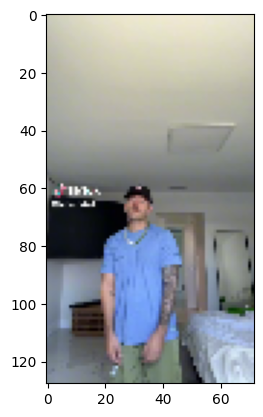

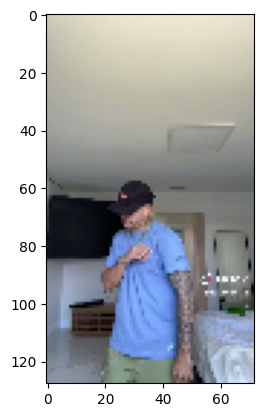

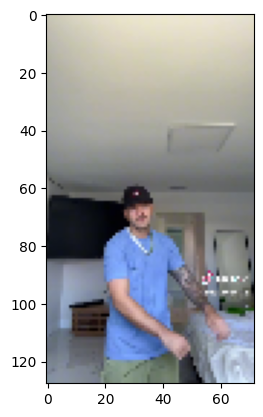

In [12]:
import torch
import matplotlib.pyplot as plt
for i in range(3):
    # select a frame
    image_tensor = targets.squeeze()[:,i,:,:]
    numpy_image = image_tensor.detach().numpy()

    # imshow (Height, Width, Channels)
    numpy_image = numpy_image.transpose((1, 2, 0))

    # normalize to 0,1
    numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

    plt.imshow(numpy_image)
    plt.show()

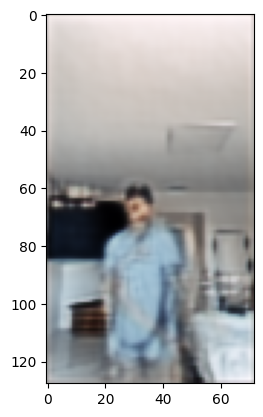

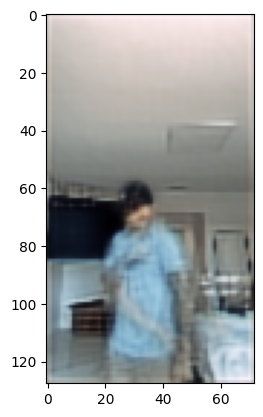

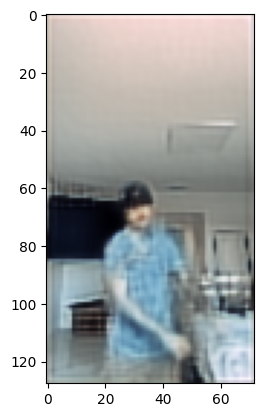

In [13]:
import torch
import matplotlib.pyplot as plt

for i in range(3):
    # select a frame
    image_tensor = outputs.squeeze()[:,i,:,:]
    numpy_image = image_tensor.detach().numpy()

    # imshow (Height, Width, Channels)
    numpy_image = numpy_image.transpose((1, 2, 0))

    # normalize to 0,1
    numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

    plt.imshow(numpy_image)
    plt.show()

In [14]:
check = 7
i = 0
for inputs, targets in val_loader:
    i += 1
    if i == check:
        inputs, targets = inputs.to(torch.float32), targets.to(torch.float32)
        outputs = model(inputs)
        break
outputs.squeeze()[:,1,:,:]

tensor([[[ 90.0291,  81.4524, 104.7195,  ..., 127.8906, 128.0125, 125.6484],
         [ 89.5343,  93.9593, 127.5595,  ..., 150.7250, 152.6044, 141.9269],
         [114.8683, 135.5432, 151.6238,  ..., 171.2447, 173.2445, 157.3225],
         ...,
         [114.6525, 149.1677, 156.2567,  ...,  99.6861,  95.8724,  97.7159],
         [102.4966, 125.1583, 131.9118,  ...,  53.8472,  51.5667,  70.3905],
         [101.9542, 110.4967, 112.8553,  ...,  49.6768,  51.8879,  76.7344]],

        [[ 73.6491,  65.1437,  81.6685,  ..., 117.9047, 118.2668, 119.4521],
         [ 70.6693,  69.1113,  92.1207,  ..., 129.5544, 132.0158, 128.7183],
         [ 94.6296, 102.3860, 113.0372,  ..., 142.2970, 146.2473, 140.3015],
         ...,
         [ 95.0345, 122.8512, 132.8220,  ...,  73.8779,  72.5479,  80.1731],
         [ 83.7084,  95.7421, 104.9273,  ...,  34.8825,  34.9213,  54.2825],
         [ 93.2970,  93.0531,  97.3341,  ...,  37.7399,  40.0321,  60.4391]],

        [[ 71.9708,  57.1326,  74.3878,  ...

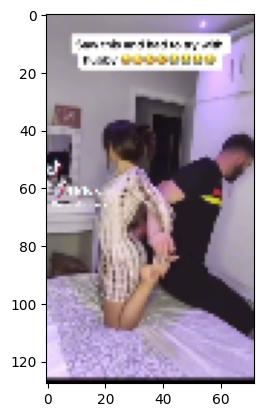

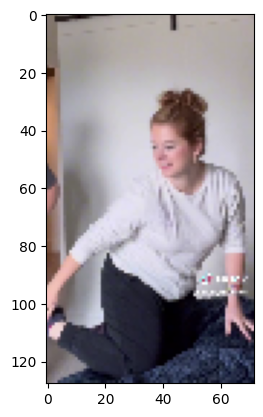

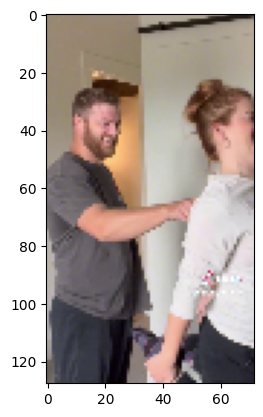

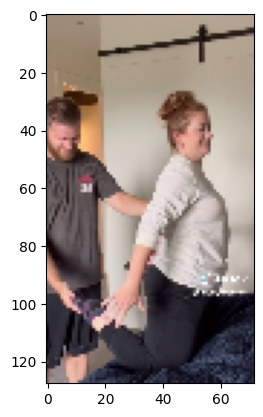

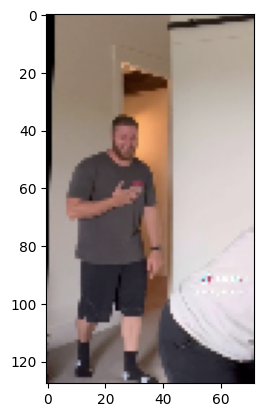

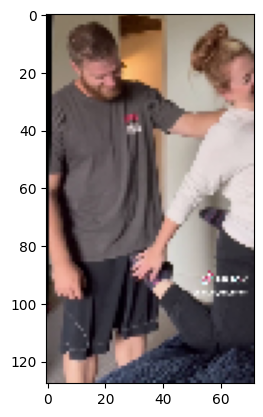

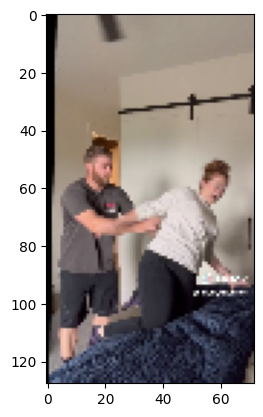

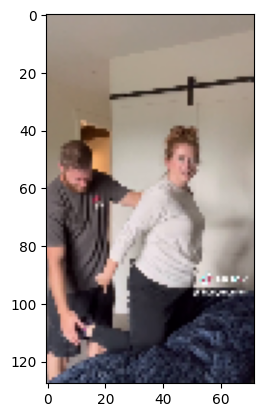

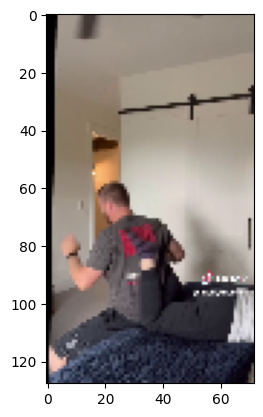

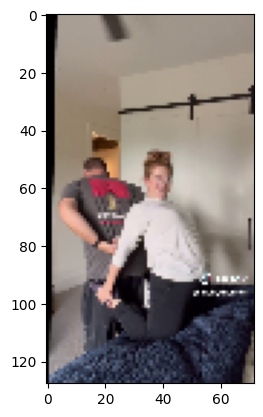

In [15]:
import torch
import matplotlib.pyplot as plt
for i in range(10):
    # select a frame
    image_tensor = targets.squeeze()[:,i,:,:]
    numpy_image = image_tensor.detach().numpy()

    # imshow (Height, Width, Channels)
    numpy_image = numpy_image.transpose((1, 2, 0))

    # normalize to 0,1
    numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

    plt.imshow(numpy_image)
    plt.show()

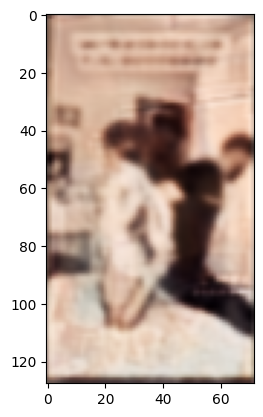

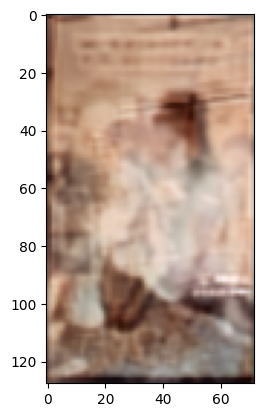

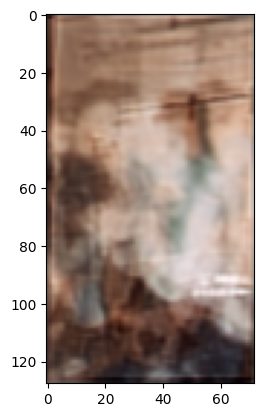

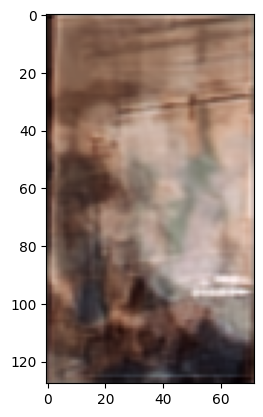

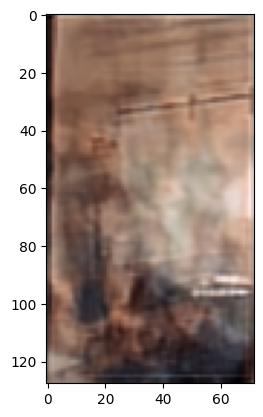

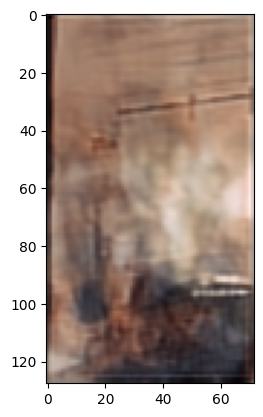

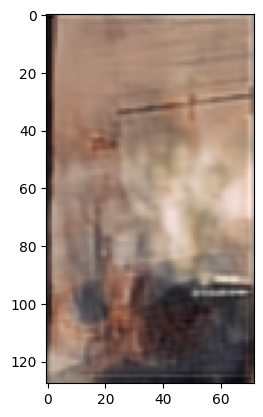

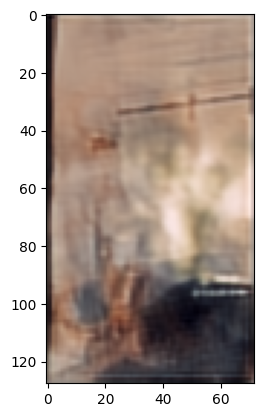

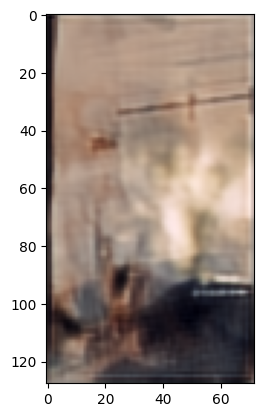

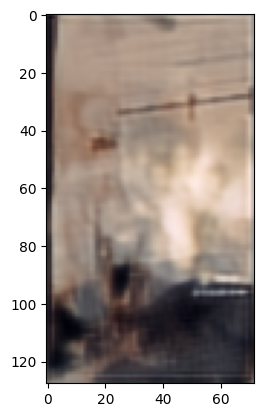

In [16]:
import torch
import matplotlib.pyplot as plt

for i in range(10):
    # select a frame
    image_tensor = outputs.squeeze()[:,i,:,:]
    numpy_image = image_tensor.detach().numpy()

    # imshow (Height, Width, Channels)
    numpy_image = numpy_image.transpose((1, 2, 0))

    # normalize to 0,1
    numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

    plt.imshow(numpy_image)
    plt.show()